### Loading Data

In [1]:
import pandas as pd
import numpy as np
import keras
import sklearn
from matplotlib import pyplot as plt

data=np.zeros((0,11))
for year in range(1950,2020,10):
    df = pd.read_csv('SpotifyData/' + str(year) + '.csv')
    tmp = df.to_numpy()[:,4:].astype('double') #Converting data to numpy
    data = np.concatenate((data,tmp), axis=0) 

df_2010 = pd.read_csv('SpotifyData/2010.csv')
df_2010.head()

,Number,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
0,1,bad guy,Billie Eilish,electropop,2019,135,43,70,-11,10,56,194,33,38,94
1,2,7 rings,Ariana Grande,dance pop,2019,140,32,78,-11,9,33,179,59,33,90
2,3,Old Town Road - Remix,Lil Nas X,country rap,2019,136,62,88,-6,11,64,157,5,10,89
3,4,SeÃ±orita,Shawn Mendes,canadian pop,2019,117,55,76,-6,8,75,191,4,3,88
4,5,rockstar (feat. 21 Savage),Post Malone,dfw rap,2018,160,52,59,-6,13,13,218,12,7,88


### Defining x, y

Text(0, 0.5, 'BPM')

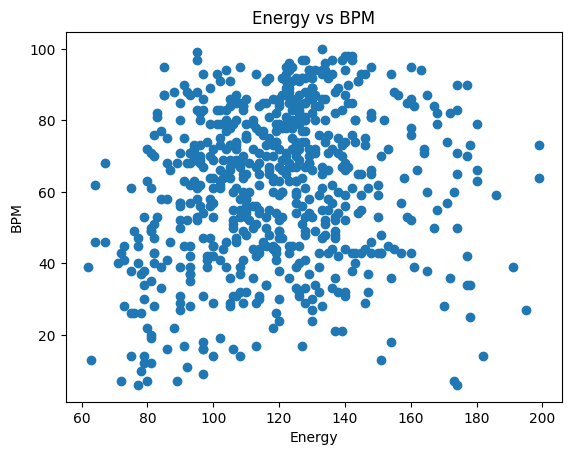

In [2]:
x = data[:,:10]#First 10 columns of input data
y = data[:,10:11]#True output data

#x is the input data,
#y is the true popularity data we want to predict
plt.figure()
plt.title("Energy vs BPM")
plt.plot(x[:,1:2],x[:,2:3],'o') 
plt.xlabel("Energy")
plt.ylabel("BPM")

### Visualsing Relations between Variables

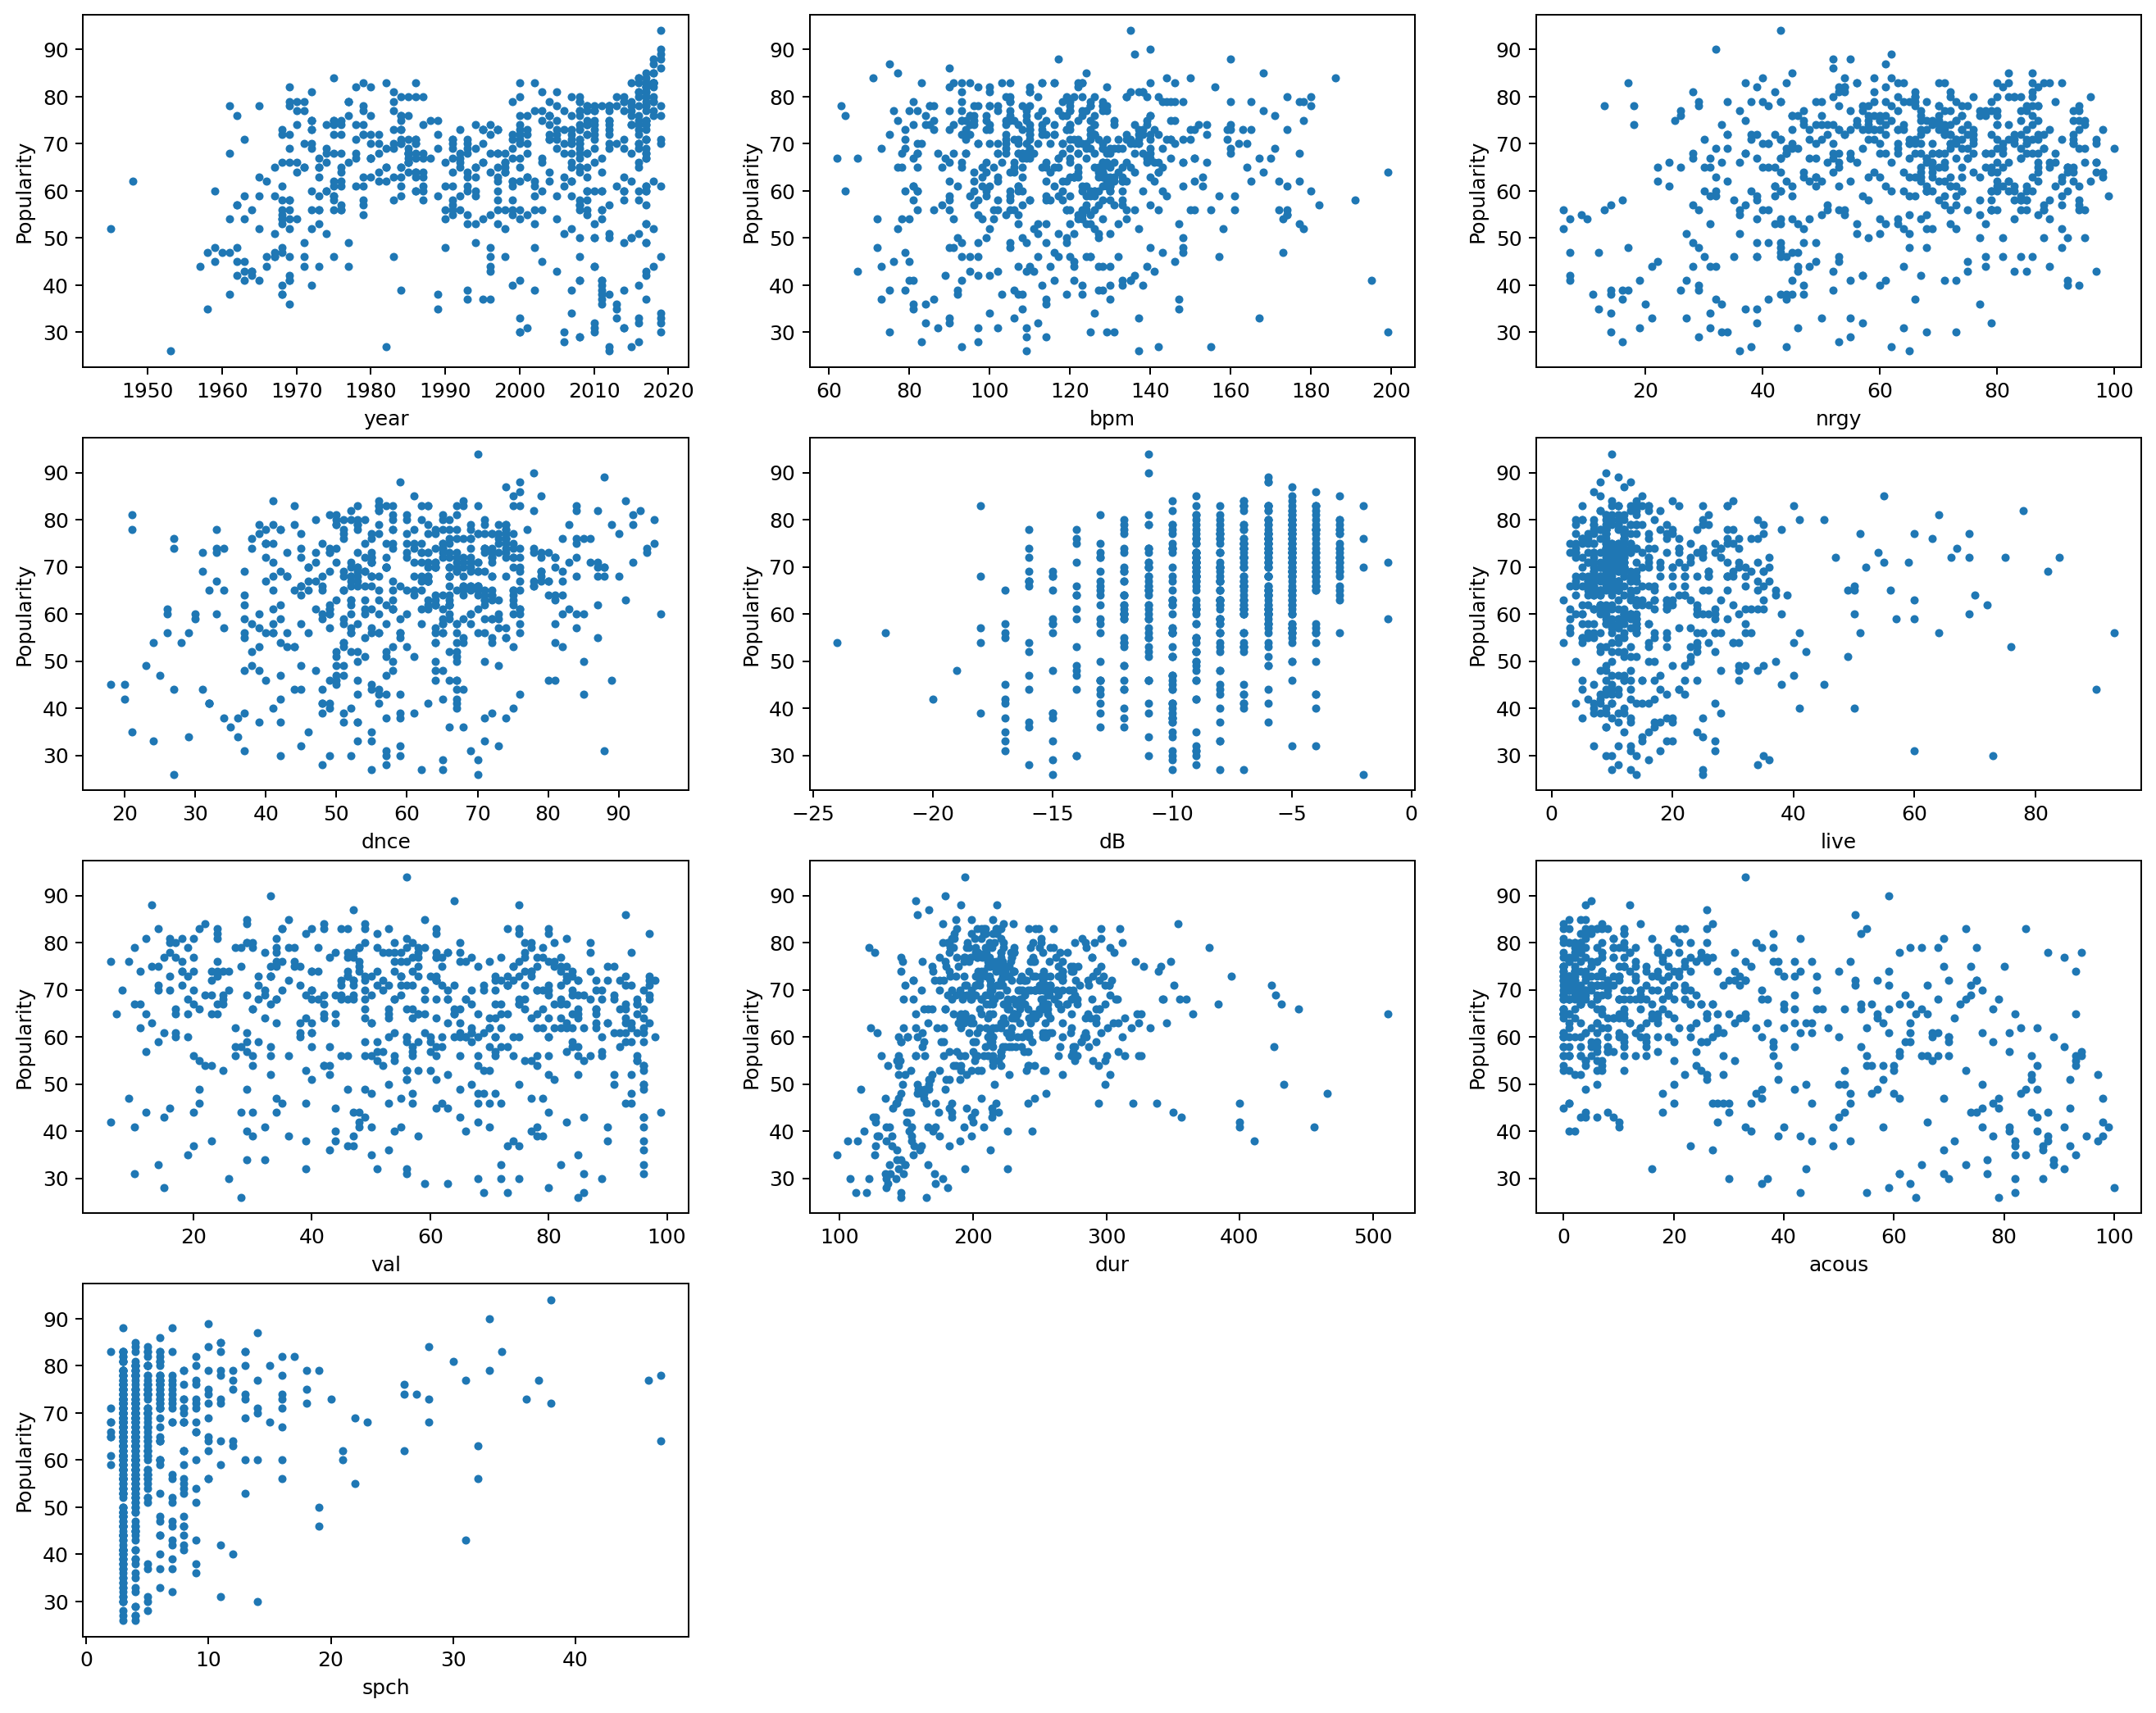

In [3]:
plt.figure(figsize=(18,18),dpi=180)
column_names = df_2010.columns[4:]

for i in range(10):
    plt.subplot(5,3,i+1)
    plt.xlabel(str(column_names[i]))
    plt.ylabel("Popularity")
    plt.plot(x[:,i],y[:,0],'.')

### Pre - Processing the Data

In [4]:
import sklearn.model_selection
import sklearn.preprocessing

#Splits into train 80% and test 20%
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2) 

#Scaling data
scalerX = sklearn.preprocessing.StandardScaler()
scalerY = sklearn.preprocessing.StandardScaler()

scalerX.fit(x_train)
scalerY.fit(y_train)

X_train = scalerX.transform(x_train)
X_test = scalerX.transform(x_test) 
    
Y_train = scalerY.transform(y_train)
Y_test = scalerY.transform(y_test)

### Training a linear regression model

In [5]:
import sklearn.linear_model
regl = sklearn.linear_model.LinearRegression()
regl.fit(X_train,Y_train[:,0:1])
Y_pred = regl.predict(X_test)

### Predicting Values

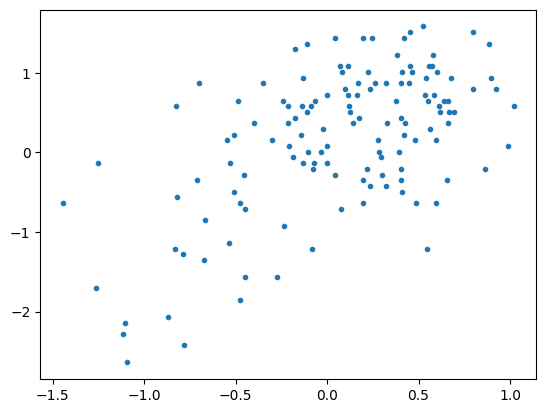

In [6]:
Y_pred = regl.predict(X_test)

plt.plot(Y_pred,Y_test,'.')

### Calculating MSE

In [7]:
mse = np.mean((Y_pred-Y_test[:,0:1])**2)
print("MSE on test data: " + str(mse))

MSE on test data: 0.5447996257892362


### Training a neural network

c:\Users\aman\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 0.9376 - mse: 0.9387 - val_loss: 0.4811 - val_mse: 0.5241
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6447 - mse: 0.6484 - val_loss: 0.4608 - val_mse: 0.5260
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5447 - mse: 0.5449 - val_loss: 0.4568 - val_mse: 0.5188
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5012 - mse: 0.4992 - val_loss: 0.4403 - val_mse: 0.4921
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5046 - mse: 0.5040 - val_loss: 0.4217 - val_mse: 0.4574
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4605 - mse: 0.4564 - val_loss: 0.4225 - val_mse: 0.4587
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4728 - mse: 0.4733 - val_loss: 0.4295 - val_mse: 0.4595
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.4395 - mse: 0.4417 - val_loss: 0.4625 - val_mse: 0.4982
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5026 - mse: 0.4991 - val_loss

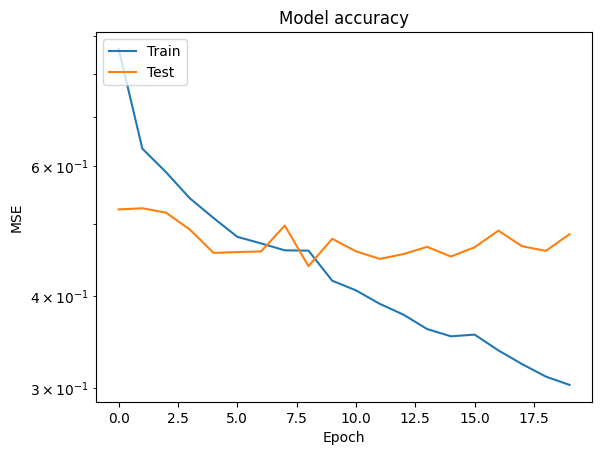

In [8]:
model = keras.models.Sequential()
#Defining each layer
model.add(keras.layers.Dense(100, input_dim=X_train.shape[1], \
activation='relu'))
model.add(keras.layers.Dense(500, activation='relu'))
model.add(keras.layers.Dense(1, activation=None))

#Defines optimisation algorithm, and how to evaluate performance.
model.compile(loss='mse', optimizer='adam', metrics=['mse'])

#Training model, defining how long to run(epochs)
#History stores performance of the model, which we can plot
history = model.fit(X_train, Y_train[:,0:1], validation_data = \
(X_test,Y_test[:,0]), epochs=20, batch_size=64) 

plt.semilogy(history.history['mse'])
plt.semilogy (history.history['val_mse'])
plt.title('Model accuracy')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


### Neural Network Predictions and MSE

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
MSE on test data: [0.48500846]


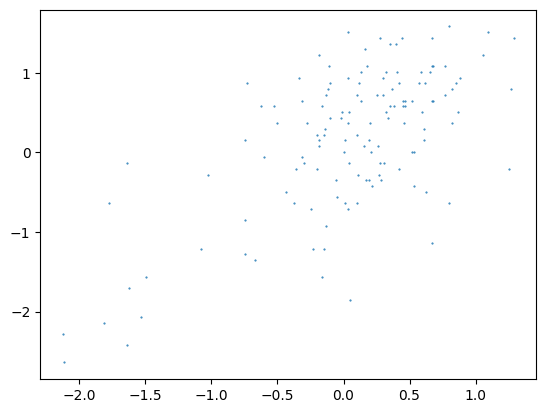

In [9]:
YNN_pred = model.predict(X_test)
plt.plot(YNN_pred,Y_test[:,0:1],'o',ms=0.5)

mse = np.mean((YNN_pred-Y_test[:,0:1])**2,axis=0)
print("MSE on test data: " + str(mse))